In [0]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[48]: [FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost-1.csv', name='media_prediction_and_its_cost-1.csv', size=16667988, modificationTime=1682550968000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost-2.csv', name='media_prediction_and_its_cost-2.csv', size=16667988, modificationTime=1682551383000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost.csv', name='media_prediction_and_its_cost.csv', size=16667988, modificationTime=1682548452000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost_NEW-1.csv', name='media_prediction_and_its_cost_NEW-1.csv', size=14592433, modificationTime=1682602944000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost_NEW.csv', name='media_prediction_and_its_cost_NEW.csv', size=14592433, modificationTime=1682555895000)]

In [0]:
# File location and type
file_location = "/FileStore/tables/media_prediction_and_its_cost-2.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

food_category food_department food_family store_sales(in millions) store_cost(in millions) unit_sales(in millions) promotion_name sales_country marital_status gender total_children education member_card occupation houseowner avg_cars_at home(approx)15 avg. yearly_income num_children_at_home avg_cars_at home(approx)18 brand_name SRP gross_weight net_weight recyclable_package low_fat units_per_case store_type store_city store_state store_sqft grocery_sqft frozen_sqft meat_sqft coffee_bar video_store salad_bar prepared_food florist media_type cost Breakfast Foods Frozen Foods Food 7.36 2.7232 4.0 Bag Stuffers USA M F 1.0 Partial High School Normal Skilled Manual Y 1.0 $10K - $30K 1.0 1.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 126.62 Breakfast Foods Frozen Foods Food 5.52 2.5944 3.0 Cash Register Lottery USA M M 0.0 Bachelors Degree Silver Professional Y 4.0 $50K - $70K 0.0 4.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 3.68 1.3616 2.0 High Roller Savings USA S F 4.0 Partial High School Normal Manual N 1.0 $10K - $30K 0.0 1.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 Breakfast Foods Frozen Foods Food 3.68 1.1776 2.0 Cash Register Lottery USA M F 2.0 High School Degree Bronze Manual Y 2.0 $30K - $50K 2.0 2.0 Carrington 1.84 19.7 17.7 1.0 0.0 17.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 Breakfast Foods Frozen Foods Food 4.08 1.428 3.0 Double Down Sale USA M M 0.0 Partial High School Bronze Skilled Manual N 2.0 $30K - $50K 0.0 2.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Double Down Sale USA M F 2.0 Bachelors Degree Bronze Professional N 1.0 $50K - $70K 2.0 1.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Radio 50.79 Breakfast Foods Frozen Foods Food 5.44 2.5568 4.0 Cash Register Lottery USA S F 4.0 High School Degree Bronze Skilled Manual N 2.0 $30K - $50K 0.0 2.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 In-Store Coupon 95.78 Breakfast Foods Frozen Foods Food 3.74 1.6082 2.0 Cash Register Lottery USA S M 1.0 Partial High School Bronze Manual Y 4.0 $50K - $70K 0.0 4.0 Imagine 1.87 16.7 14.7 1.0 1.0 10.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 4.08 1.4688 3.0 Cash Register Lottery USA S F 2.0 Partial High School Normal Skilled Manual N 2.0 $10K - $30K 0.0 2.0 Golden 1.36 7.12 5.11 0.0 1.0 29.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 59.86 Breakfast Foods Frozen Foods Food 9.72 4.5684 3.0 High Roller Savings USA S F 3.0 Graduate Degree Bronze Professional N 1.0 $70K - $90K 0.0 1.0 Big Time 3.24 16.3 14.2 1.0 0.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper, Radio 84.16 Breakfast Foods Frozen Foods Food 9.72 4.0824 3.0 Green Light Days USA S M 2.0 Graduate Degree Bronze Professional N 3.0 $70K - $90K 0.0 3.0 Big Time 3.24 16.3 14.2 1.0 0.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Daily Paper 66.27 Breakfast Foods Frozen Foods Food 3.28 1.5416 2.0 Bag Stuffers USA S M 1.0 Bachelors Degree Bronze Professional N 2.0 $110K - $130K 0.0 2.0 PigTail 1.64 14.1 13.1 0.0 1.0 25.0 Deluxe Supermarket Salem OR 27694.0 18670.0 5415.0 3610.0 1.0 1.0 1.0 1.0 1.0 Product Attachment 82.62 Breakfast Foods Frozen Foods Food 4.08 1.3464 3.0 Big Time Savings USA S F

In [0]:
df_raw = df.toPandas()

In [0]:
df_raw.columns

Out[46]: Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)15',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx)18', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [0]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_raw.columns:
    uni_len = len(set(df_raw[c]))
    dtype = df_raw[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)15
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)18


In [0]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(df_raw[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(df_raw[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

store_sales(in millions) 
 store_cost(in millions) 
 unit_sales(in millions) 
 total_children 
 avg_cars_at home(approx)15 
 num_children_at_home 
 avg_cars_at home(approx)18 
 SRP 
 gross_weight 
 net_weight 
 units_per_case 
 store_sqft 
 grocery_sqft 
 frozen_sqft 
 meat_sqft 
 cost 
 
 
 
 
 0 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 2 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 3 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 4 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 -1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 60423 
 1 
 1 
 -1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 60424 
 1 
 -1 
 -1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 -1 
 1 
 1 
 1 
 1 
 1 
 
 
 60425 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 60426 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 -1 
 1 
 1 
 1 
 
 
 60427 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 1 
 -1 
 1 
 1 
 1 
 
 
 
 60428 rows × 16 columns

In [0]:
df_woOut = df_raw.iloc[outlier_pred == 1]
df_woOut

food_category 
 food_department 
 food_family 
 store_sales(in millions) 
 store_cost(in millions) 
 unit_sales(in millions) 
 promotion_name 
 sales_country 
 marital_status 
 gender 
 ... 
 grocery_sqft 
 frozen_sqft 
 meat_sqft 
 coffee_bar 
 video_store 
 salad_bar 
 prepared_food 
 florist 
 media_type 
 cost 
 
 
 
 
 0 
 Breakfast Foods 
 Frozen Foods 
 Food 
 7.36 
 2.7232 
 4.0 
 Bag Stuffers 
 USA 
 M 
 F 
 ... 
 18670.0 
 5415.0 
 3610.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 Daily Paper, Radio 
 126.62 
 
 
 1 
 Breakfast Foods 
 Frozen Foods 
 Food 
 5.52 
 2.5944 
 3.0 
 Cash Register Lottery 
 USA 
 M 
 M 
 ... 
 18670.0 
 5415.0 
 3610.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 Daily Paper, Radio 
 59.86 
 
 
 2 
 Breakfast Foods 
 Frozen Foods 
 Food 
 3.68 
 1.3616 
 2.0 
 High Roller Savings 
 USA 
 S 
 F 
 ... 
 18670.0 
 5415.0 
 3610.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 Daily Paper, Radio 
 84.16 
 
 
 3 
 Breakfast Foods 
 Frozen Foods 
 Food 
 3.68 
 1.1776 
 2.0 
 Cash Register Lottery 
 USA 
 M 
 F 
 ... 
 18670.0 
 5415.0 
 3610.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 In-Store Coupon 
 95.78 
 
 
 6 
 Breakfast Foods 
 Frozen Foods 
 Food 
 5.44 
 2.5568 
 4.0 
 Cash Register Lottery 
 USA 
 S 
 F 
 ... 
 18670.0 
 5415.0 
 3610.0 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0 
 In-Store Coupon 
 95.78 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 60423 
 Specialty 
 Carousel 
 Non-Consumable 
 2.76 
 1.3248 
 1.0 
 You Save Days 
 USA 
 M 
 F 
 ... 
 15321.0 
 4294.0 
 2863.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 In-Store Coupon 
 95.25 
 
 
 60424 
 Specialty 
 Carousel 
 Non-Consumable 
 1.60 
 0.4960 
 1.0 
 Price Cutters 
 USA 
 S 
 F 
 ... 
 15321.0 
 4294.0 
 2863.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 Sunday Paper 
 69.42 
 
 
 60425 
 Specialty 
 Carousel 
 Non-Consumable 
 5.52 
 2.5392 
 2.0 
 Weekend Markdown 
 USA 
 M 
 M 
 ... 
 15321.0 
 4294.0 
 2863.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 Sunday Paper, Radio, TV 
 67.51 
 
 
 60426 
 Specialty 
 Carousel 
 Non-Consumable 
 8.28 
 2.5668 
 3.0 
 Sales Days 
 Canada 
 S 
 M 
 ... 
 27463.0 
 4193.0 
 2795.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 Sunday Paper 
 132.88 
 
 
 60427 
 Specialty 
 Carousel 
 Non-Consumable 
 9.20 
 4.2320 
 4.0 
 Super Duper Savers 
 Canada 
 S 
 F 
 ... 
 27463.0 
 4193.0 
 2795.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 Daily Paper, Radio 
 87.76 
 
 
 
 57423 rows × 40 columns

Out[8]: Text(0.5, 1.0, 'Correlation Matrix')

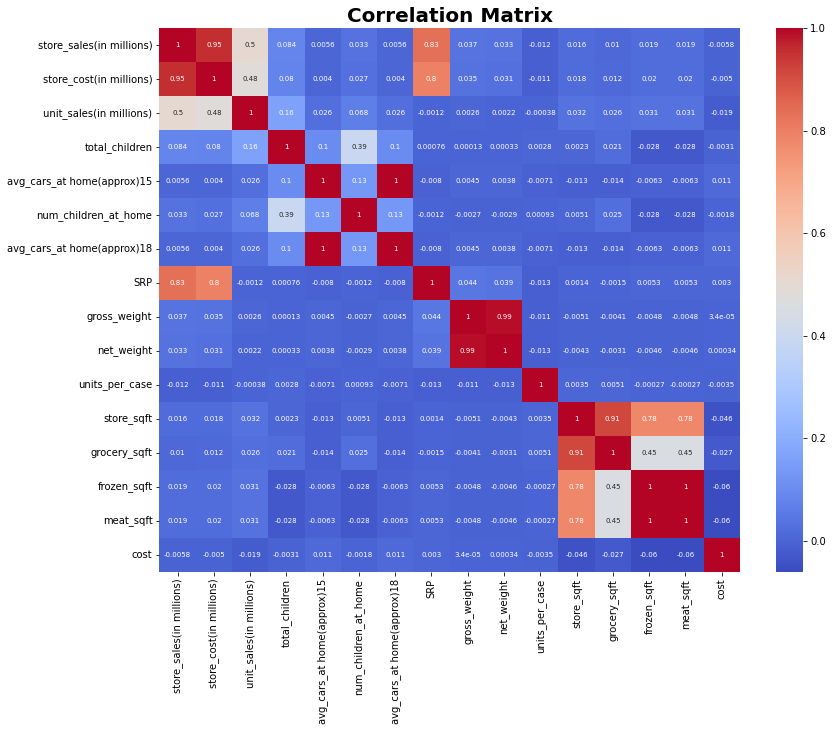

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

# Feature Engineering

According to the correlation matrix, we will do feature engineering to preserve as much data as possible at this stage while not facing multicollinearity.

In [0]:
df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
df_woOut['meat_to_total_ratio'] = df_woOut['meat_sqft'] / df_woOut['store_sqft']

<command-2325449507375208>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
<command-2325449507375208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
<command-2325449507375208>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [0]:
df_woOut.columns

Out[41]: Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)15',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx)18', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost', 'sales_to_cost_ratio',
       'frozen_to_meat_ratio', 'meat_to_total_ratio'],
      dtype='object')

In [0]:
df_woOut = df_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-2325449507375209> in <cell line: 1>()
----> 1 df_woOut = df_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
      2                           'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

/databricks/python/lib/python3.9/site-packages/pandas/util/_decorators.py in wrapper(*args, **kwargs)
    309                     stacklevel=stacklevel,
    310                 )
--> 311             return func(*args, **kwargs)
    312 
    313         return wrapper

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py in drop(self, labels, axis, index, columns, level, inplace, errors)
   4904                 weight  1.0     0.8
   4905         """
-> 4906         return super().drop(
   4907             labels=labels,
   49

In [0]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_woOut.columns:
    uni_len = len(set(df_woOut[c]))
    dtype = df_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)15
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)18


Out[12]: Text(0.5, 1.0, 'Correlation Matrix')

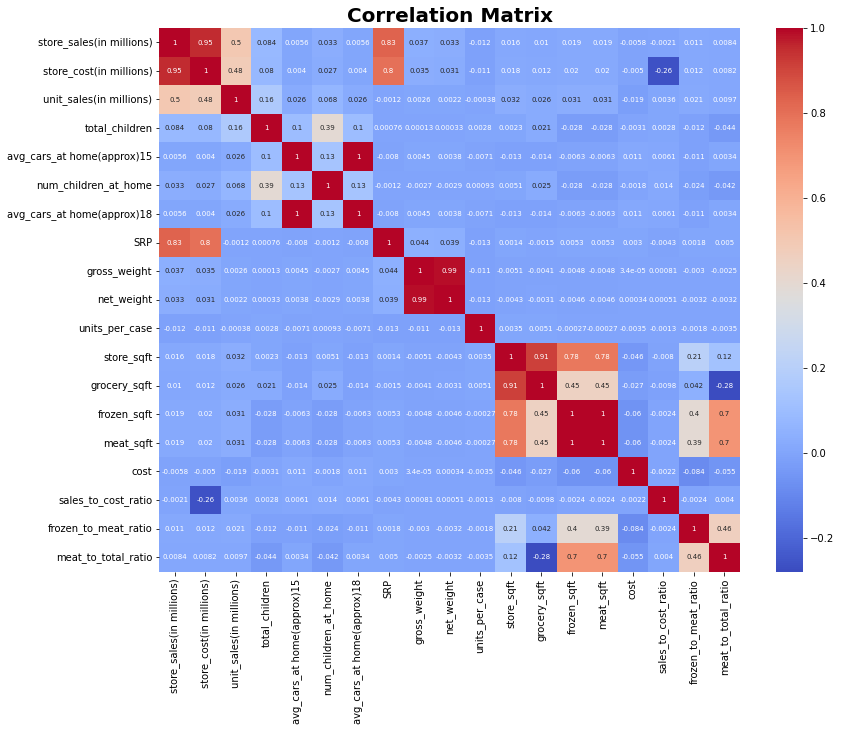

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

In [0]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
MinMax_scaled = min_max_scaler.fit_transform(df_woOut[cols])

MinMax_scaled

Out[13]: array([[-0.38866577, -0.46461995,  0.2       , ...,  0.05405405,
         0.11000332,  0.26845737],
       [-0.55287818, -0.49155626, -0.2       , ..., -0.80851064,
         0.11000332,  0.26845737],
       [-0.71709058, -0.74937522, -0.6       , ...,  0.05405405,
         0.11000332,  0.26845737],
       ...,
       [-0.55287818, -0.50310039, -0.6       , ..., -0.73913043,
        -0.4091355 ,  0.19257961],
       [-0.30655957, -0.49732833, -0.2       , ...,  0.83870968,
         0.64177236, -0.98319777],
       [-0.22445337, -0.14908034,  0.2       , ..., -0.73913043,
         0.64177236, -0.98319777]])

In [0]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_woOut[cols])
std_scaled

Out[14]: array([[ 0.23680601,  0.07233608,  1.09602519, ...,  0.39259738,
        -0.01604716,  0.18363349],
       [-0.29394127, -0.01624973, -0.11019699, ..., -1.11761199,
        -0.01604716,  0.18363349],
       [-0.82468854, -0.86414255, -1.31641916, ...,  0.39259738,
        -0.01604716,  0.18363349],
       ...,
       [-0.29394127, -0.05421508, -1.31641916, ..., -0.99613863,
        -0.97003583,  0.05803928],
       [ 0.50217965, -0.03523241, -0.11019699, ...,  1.76640074,
         0.96115125, -1.88812817],
       [ 0.76755329,  1.11005565,  1.09602519, ..., -0.99613863,
         0.96115125, -1.88812817]])

In [0]:
#df = pd.DataFrame(std_scaled, columns = [c for c in num_cols if c != 'cost'])
df = pd.DataFrame(MinMax_scaled, columns = [c for c in num_cols if c != 'cost'])

# Concatenate standardized/normalized numerical columns with the others
df = pd.concat([df.reset_index(drop=True), 
                df_woOut[cate_cols + pre_dum_cols].reset_index(drop=True)], axis=1)

### Dropping irrelevant attributes

We will drop irrelevant attributes or attributes that have too many variables to avoid over-complicating our model.

In [0]:
df = df.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name'], axis = 1)

### Dummifying categorical variables

Since 'media_type' will be our treatment for the causal inference, we encode it differently not to add too many features/predictors to our model.

In [0]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit_transform(df['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df['media_type_labeled'] = label_encoder.fit_transform(df['media_type'].tolist())

In [0]:
# Dummify categorical variables except for 'media type'
df = pd.get_dummies(df[[c for c in df.columns if c != 'media_type']], drop_first = True)

In [0]:
df

store_sales(in millions) 
 store_cost(in millions) 
 unit_sales(in millions) 
 total_children 
 avg_cars_at home(approx)15 
 num_children_at_home 
 avg_cars_at home(approx)18 
 SRP 
 gross_weight 
 net_weight 
 ... 
 store_type_Supermarket 
 store_state_CA 
 store_state_DF 
 store_state_Guerrero 
 store_state_Jalisco 
 store_state_OR 
 store_state_Veracruz 
 store_state_WA 
 store_state_Yucatan 
 store_state_Zacatecas 
 
 
 
 
 0 
 -0.388666 
 -0.464620 
 0.2 
 -0.6 
 -0.5 
 -0.6 
 -0.5 
 -0.229885 
 0.723270 
 0.650704 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 1 
 -0.552878 
 -0.491556 
 -0.2 
 -1.0 
 1.0 
 -1.0 
 1.0 
 -0.229885 
 0.723270 
 0.650704 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 2 
 -0.717091 
 -0.749375 
 -0.6 
 0.6 
 -0.5 
 -1.0 
 -0.5 
 -0.229885 
 0.723270 
 0.650704 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 3 
 -0.717091 
 -0.787856 
 -0.6 
 -0.2 
 0.0 
 -0.2 
 0.0 
 -0.229885 
 0.723270 
 0.650704 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 4 
 -0.560018 
 -0.499420 
 0.2 
 0.6 
 0.0 
 -1.0 
 0.0 
 -0.505747 
 -0.859119 
 -0.767887 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 57418 
 -0.799197 
 -0.757071 
 -1.0 
 -0.6 
 -0.5 
 -0.6 
 -0.5 
 0.298851 
 0.710692 
 0.752113 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 57419 
 -0.902722 
 -0.930401 
 -1.0 
 -0.2 
 0.0 
 -1.0 
 0.0 
 -0.367816 
 0.433962 
 0.380282 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 57420 
 -0.552878 
 -0.503100 
 -0.6 
 -0.6 
 0.5 
 -1.0 
 0.5 
 0.298851 
 0.710692 
 0.752113 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 57421 
 -0.306560 
 -0.497328 
 -0.2 
 -0.2 
 1.0 
 -1.0 
 1.0 
 0.298851 
 0.710692 
 0.752113 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 57422 
 -0.224453 
 -0.149080 
 0.2 
 0.2 
 -0.5 
 -1.0 
 -0.5 
 0.034483 
 0.949686 
 0.853521 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 57423 rows × 64 columns

# Feature Selection

For feature selection, we will run Random Forest and select predictors for our model based on the feature importances.

In [0]:
y = df_woOut['cost']

First, we will only use numerical variables as our predictors to identify significant numeric predictors.

In [0]:
df_raw.columns

Out[21]: Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)15',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx)18', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [0]:
X = df[['unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'frozen_to_meat_ratio', 'meat_to_total_ratio']]

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-2325449507375227> in <cell line: 1>()
----> 1 X = df[['unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'frozen_to_meat_ratio', 'meat_to_total_ratio']]

/databricks/python/lib/python3.9/site-packages/pandas/core/frame.py in __getitem__(self, key)
   3462             if is_iterator(key):
   3463                 key = list(key)
-> 3464             indexer = self.loc._get_listlike_indexer(key, axis=1)[1]
   3465 
   3466         # take() does not accept boolean indexers

/databricks/python/lib/python3.9/site-packages/pandas/core/indexing.py in _get_listlike_indexer(self, key, axis)
   1312             keyarr, indexer, new_indexer = ax._reindex_non_unique(keyarr)
   1313 
-> 1314         self._validate_read_indexer(keyarr, i

In [0]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375228> in <cell line: 3>()
      1 # Splitting the data into train and test sets
      2 from sklearn.model_selection import train_test_split
----> 3 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

NameError: name 'X' is not defined

In [0]:
# Building the random forest model
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 5, n_estimators = 500)
model_rf = randomforest.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375229> in <cell line: 5>()
      3 
      4 randomforest = RandomForestRegressor(random_state = 0, max_features = 5, n_estimators = 500)
----> 5 model_rf = randomforest.fit(X_train, y_train)
      6 y_test_pred = model_rf.predict(X_test)

NameError: name 'X_train' is not defined

In [0]:
model_rf.feature_importances_

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375230> in <cell line: 1>()
----> 1 model_rf.feature_importances_

NameError: name 'model_rf' is not defined

In [0]:
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375231> in <cell line: 1>()
----> 1 pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

NameError: name 'model_rf' is not defined

Setting a threshold of approximately 5 percent for relative feature importances, we will not include frozen_to_meat_ratio as a predictor in our models.

We will now experiment with all the remaining attributes.

In [0]:
X_new = df.drop(['frozen_to_meat_ratio'], axis = 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 10, n_estimators = 1000)
model_rf_new = randomforest.fit(X_train_new, y_train)
y_test_pred_new = model_rf_new.predict(X_test_new)

In [0]:
model_rf_new.feature_importances_

In [0]:
X_new.columns.to_numpy()

In [0]:
feature_significances = pd.DataFrame(data = model_rf_new.feature_importances_, index = X_new.columns.to_numpy(), columns = ['feature significance'])
feature_significances.sort_values('feature significance', ascending = False)

In [0]:
from sklearn.metrics import mean_squared_error
forest_all_mse = mean_squared_error(y_test, y_test_pred_new, squared=False)
forest_all_mse

Therefore, we will select variables with a feature importance of greater than or equal to 0.015 as our predictors.

In [0]:
X_final = df[['media_type_labeled', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'total_children', 'avg_cars_at home(approx)', 'meat_to_total_ratio',
              'num_children_at_home', 'unit_sales(in millions)', 'gender_M', 'houseowner_Y']]

# Model Development

In [0]:
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size = 0.3, random_state = 0)

In [0]:
X_test_final, X_val_final, y_test, y_val = train_test_split(X_test_final, y_test, test_size = 0.5, random_state = 0)

## Baseline Model

In [0]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
base_model = dr.fit(X_train_final, y_train)
y_test_pred_base = base_model.predict(X_test_final)

In [0]:
base_mse = mean_squared_error(y_test, y_test_pred_base, squared=False)
base_mse

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375248> in <cell line: 1>()
----> 1 base_mse = mean_squared_error(y_test, y_test_pred_base, squared=False)
      2 base_mse

NameError: name 'y_test_pred_base' is not defined

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0, max_features = 10, max_depth = 5)
model_dt_final = dt.fit(X_train_final, y_train)
y_test_pred_final = model_dt_final.predict(X_test_final)

In [0]:
decisiontree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
decisiontree_pred_mse

## Random Forest

In [0]:
randomforest = RandomForestRegressor(random_state = 0)
model_rf_final = randomforest.fit(X_train_final, y_train)
y_test_pred_final = model_rf_final.predict(X_test_final)

In [0]:
randomforest_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
randomforest_pred_mse

## Extra Tree

In [0]:
from sklearn.ensemble import ExtraTreesRegressor
extratree = ExtraTreesRegressor(random_state = 0)
model_et_final = extratree.fit(X_train_final, y_train)
y_test_pred_final = model_et_final.predict(X_test_final)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375256> in <cell line: 3>()
      1 from sklearn.ensemble import ExtraTreesRegressor
      2 extratree = ExtraTreesRegressor(random_state = 0)
----> 3 model_et_final = extratree.fit(X_train_final, y_train)
      4 y_test_pred_final = model_et_final.predict(X_test_final)

NameError: name 'X_train_final' is not defined

In [0]:
extratree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
extratree_pred_mse

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-2325449507375257> in <cell line: 1>()
----> 1 extratree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
      2 extratree_pred_mse

NameError: name 'y_test_pred_final' is not defined

## AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state = 0, n_estimators = 1000)
model_ab_final = adaboost.fit(X_train_final, y_train)
y_test_pred_final = model_ab_final.predict(X_test_final)

In [0]:
adaboost_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
adaboost_pred_mse

## Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0)
model_gb_final = gb.fit(X_train_final, y_train)
y_test_pred_final = model_gb_final.predict(X_test_final)

In [0]:
gb_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
gb_pred_mse

# LightGBM

In [0]:
import lightgbm as ltb
lgbm = ltb.LGBMRegressor(random_state = 0)
model_lgbm_final = lgbm.fit(X_train_final,y_train)
y_test_pred = model_lgbm_final.predict(X_test_final)

In [0]:
lgbm_mse = mean_squared_error(y_test, y_test_pred, squared=False)
lgbm_mse

# XGBoost

In [0]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(random_state = 0)
model_xgbr_final = xgbr.fit(X_train_final,y_train)
y_test_pred = model_xgbr_final.predict(X_test_final)

In [0]:
xgbr_mse = mean_squared_error(y_test, y_test_pred, squared=False)
xgbr_mse

## Artificial Neural Network

In [0]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(hidden_layer_sizes = (20), max_iter = 2000, random_state = 0)
model_ann_final = ann.fit(X_train_final, y_train)
y_test_pred_final = model_ann_final.predict(X_test_final)

In [0]:
ann_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
ann_pred_mse

# Model Selection and Cross Validation

According to the results, the Extra Tree model performs the best since it has the lowest MSE. Therefore, we will chose it as our final model and do cross-validation.

In [0]:
final_model = model_et_final

In [0]:
# According to the size of our dataset, we will divide it to 10 folds for cross-validation
from sklearn.model_selection import cross_val_score
final_model.fit(X_train_final, y_train)
et_mses = -cross_val_score(final_model, X_test_final, y_test, scoring="neg_root_mean_squared_error", cv=10)

In [0]:
pd.Series(et_mses).describe()

In [0]:
final_model.fit(X_train_final, y_train)
final_predictions = final_model.predict(X_test_final)
final_mse = mean_squared_error(y_test, final_predictions, squared=False)
final_mse

# Hyperparameter Optimization

Having the extra tree model chosen as our final model, we are trying to find optimal hyperparameters for this model. We will modify the number of trees (n_estimators), criterion, the maximum depth of the tree (max_depth), and whether to reuse the solution of the previous call to fit and add more estimators to the ensemble (warm_start). Also, we will consider Grid Search, Randomized Search, and Bayesian Optimization and compare the results.

Randomized Search

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_space = {
    'n_estimators': sp_randint(200, 1000),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': range(6, 13),
    'warm_start': [False, True]
}

In [0]:
rs = RandomizedSearchCV(
    estimator=final_model,
    param_distributions=param_space,
    n_iter=5,
    cv=5,
    random_state=0,
    n_jobs=-1
)

In [0]:
rs.fit(X_train_final, y_train)

In [0]:
print(rs.best_params_)

Developing the model with optimal parameters

In [0]:
et_rand_opt = ExtraTreesRegressor(random_state = 0, criterion = 'poisson', max_depth = 12, n_estimators = 672, warm_start = False)
model_et_rand_opt = et_rand_opt.fit(X_train_final, y_train)
y_val_pred_rand_opt = model_et_rand_opt.predict(X_val_final)

In [0]:
extratree_rand_opt_mse = mean_squared_error(y_val, y_val_pred_rand_opt, squared=False)
extratree_rand_opt_mse

In [0]:
# MLflow connection

experiment_id = "3695908922155295"

with mlflow.start_run(experiment_id = experiment_id) as run:
    mlflow.sklearn.log_model(gbr, "model")
    model_uri = mlflow.get_artifact_uri("model")
    result = mlflow.evaluate(
        model=model_uri,
        data=eval_data,
        targets="target",
        model_type="regressor",
        evaluators=["default"],
        custom_metrics=[
            make_metric(
                eval_fn=squared_diff_plus_one,
                greater_is_better=False,
            ),
            make_metric(
                eval_fn=sum_on_target_divided_by_two,
                greater_is_better=True,
            ),
        ],
        custom_artifacts=[prediction_target_scatter],
    )